In [452]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras

types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', 'space', 'del', 'nothing']

(480, 640, 3)


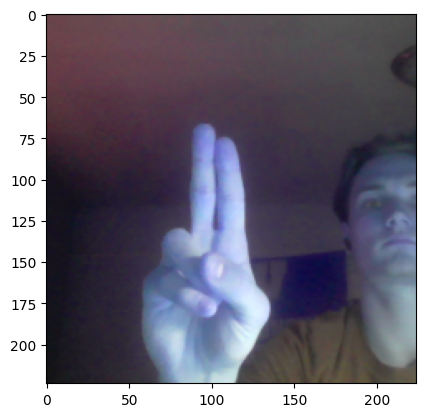

In [453]:
get_saved = False

frame = None
if(get_saved):
    frame = cv2.imread("data/asl_alphabet_train/asl_alphabet_train/A/A1801.jpg")
else:
    vid = cv2.VideoCapture(0)
    time.sleep(1)
    ret, frame = vid.read()

print(frame.shape)

# resize to be 200x200 without distortion
height = frame.shape[0]
width = frame.shape[1]
frame = frame[:, int(width/2-height/2):int(width/2+height/2)]
frame=cv2.resize(frame, (224, 224), interpolation = cv2.INTER_AREA)

if(not get_saved):
    vid.release()
  
# plot that grayscale image with Matplotlib
# cmap stands for colormap
plt.imshow(frame)
  
# display that image
plt.show()


In [454]:
TARGET_SIZE = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

IMG_SHAPE = TARGET_SIZE + (3,)
base_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.trainable = False

pooling_average_layer = tf.keras.layers.AveragePooling2D(pool_size=7)

flatten_layer = tf.keras.layers.Flatten()

prediction_layer = tf.keras.layers.Dense(29, activation='softmax')

BASE_OUTPUT_SIZE = 512

# This defines the top layers
top_input = tf.keras.Input(shape=BASE_OUTPUT_SIZE)
x = flatten_layer(top_input)
top_output = prediction_layer(x)
top_model = tf.keras.Model(top_input, top_output)

checkpointFile = r'TransferVGG16'

# This reads in the weights for the top layers.
top_model.load_weights(checkpointFile)

# This is the bottom layers (the predefined stuff)
bottom_input = tf.keras.Input(shape=(TARGET_SIZE + (3,)))
x = preprocess_input(bottom_input)
x = base_model(x)
x = pooling_average_layer(x)
bottom_output = flatten_layer(x)
bottom_model = tf.keras.Model(bottom_input, bottom_output)

img = tf.image.resize(frame, TARGET_SIZE)
img = tf.cast(img, dtype=tf.uint8).numpy()
img = np.reshape(img, (1, 224, 224, 3))

res = top_model.predict(bottom_model.predict(img))[0]

1/1 [==============================] - 0s 27ms/step


In [455]:
# new_model = tf.keras.models.load_model('BenNN')
# savedModel = new_model.load_weights('BenNNweights')
# new_model.summary()

In [456]:
# res = new_model.predict(np.reshape(frame, (1, 200, 200, 1)))

[1.4008384e-03 4.9702010e-01 9.6598485e-10 2.6196399e-06 7.0892412e-08
 1.5377028e-06 7.3728323e-10 4.8586532e-19 2.9704285e-01 7.7236940e-08
 3.4750112e-05 7.4014779e-06 1.1165751e-15 1.4239638e-06 4.1044505e-11
 4.4737421e-14 2.1791303e-14 9.9543813e-14 5.7114929e-10 1.4553863e-11
 1.0355666e-04 3.0920871e-10 1.5272519e-03 1.4308162e-10 3.7028908e-06
 9.2531307e-09 9.4917477e-06 2.4547610e-12 2.0284438e-01]
1
B


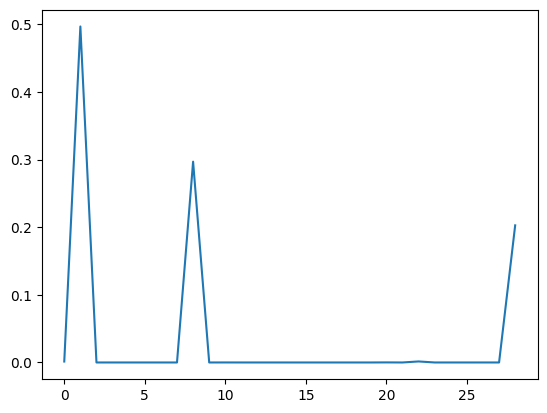

In [457]:
print(res)
maxi = np.argmax(res)
print(maxi)
result = types[maxi]
print(result)
plt.plot(np.arange(29), res)